first convert the recording to nwb format
assume that you have a nwb file somewhere


- install nwb_datajoint
- install ndx-novela
- downgrade pymysql
- set datajoint config
- install labbox ephys, no docker
export LABBOX_EPHYS_DATA_DIR=/home/user/labbox/labbox-ephys-data
- install kachery-p2p
nodejs                    12.4.0               he1b5a44_0    conda-forge/label/cf202003
conda install -c conda-forge/label/cf202003 nodejs
pip install --upgrade kachery_p2p
export KACHERY_STORAGE_DIR=/desired/file/storage/location?
- install hither
pip install --upgrade hither


- install docker
https://docs.docker.com/engine/install/ubuntu/#install-using-the-repository

-- enable running docker without sudo
sudo groupadd docker
sudo usermod -aG docker $USER
log out log back in

test if installed by running:
docker run --rm hello-world

- ask loren to give you access to lmf-db dj server

- install nwb_datajoint
install:
git clone https://github.com/LorenFrankLab/nwb_datajoint.git
cd nwb_datajoint
conda env create -f environment.yml
conda activate nwb_datajoint
python setup.py develop
test: open ipython, do import nwb_datajoint
upgrade: go to folder, do git pull, then python setup.py develop

- install datajoint (might not be necessary)
install: pip3 install datajoint
test: import datajoint as dj
configure:
after importing dj
dj.config['database.host'] = "lmf-db.cin.ucsf.edu"
dj.config['database.user'] = "user_name_here"
change pw
dj.set_password()
dj.config['database.password'] = "password_here"
dj.config.save_global()
if this gives you error, downgrade pymysql to 0.9.2
conda (or pip) install pymysql=0.9.2
update: pip3 install --upgrade datajoint

- install ndx-franklab-novela

install: 
git clone https://github.com/NovelaNeuro/ndx-franklab-novela.git
cd ndx-franklab-novela
open requirements.txt in your favorite text editor and remove the line hdmf==1.6.4
python setup.py develop
test:
import ndx-franklab-novela

- install labbox ephys
https://github.com/laboratorybox/labbox-ephys/blob/master/doc/franklab.md

install:
git clone https://github.com/laboratorybox/labbox-ephys
cd labbox-ephys
cd python
pip install -e .

update:
cd labbox-ephys
git pull
cd python
pip install -e .

- install spikeinterface
install: pip install spikeinterface
test: run ipython, import spikeinterface
update: pip install --upgrade spikeinterface



- loading labbox-ephys visualization
make sure that 
export LABBOX_EPHYS_DATA_DIR=/home/user/labbox/labbox-ephys-data
is equal to
export KACHERY_STORAGE_DIR=/path/to/labbox-ephys/kachery-storage/directory

ln -s $KACHERY_STROAGE_DIR /path/of/labbox-ephys/kachery-storage
can do this by modifying ~/.bashrc

http://host.ip.address:port/default?feed=uri_to_snippets
e.g.
http://169.230.191.61:15310/default?feed=sha1://f2c7633a2ae948347820961bf1bdcb8d7f86576e/feed.json

- steps
make a recording
convert to nwb
populate datajoint database from nwb
take data from dj and run spike sorting with spikeinterface
visualize results on labbox ephys

- when running populate from nwb
set path to stelmo (e.g. /stelmo/nwb)

In [1]:
%reload_ext autoreload
%autoreload 2

import os
from pathlib import Path

data_dir = Path('/stelmo/nwb/') # CHANGE ME TO THE BASE DIRECTORY FOR DATA STORAGE ON YOUR SYSTEM

os.environ['NWB_DATAJOINT_BASE_DIR'] = str(data_dir)
os.environ['KACHERY_STORAGE_DIR'] = str(data_dir / 'kachery-storage')

In [ ]:
from pathlib import Path
import os

import numpy as np
import pynwb
import datajoint as dj
import nwb_datajoint as nd
from ndx_franklab_novela import Probe

import spiketoolkit as st

import warnings
warnings.simplefilter('ignore')

data_dir = Path('/stelmo/nwb') # CHANGE ME TO THE BASE DIRECTORY FOR DATA STORAGE ON YOUR SYSTEM

os.environ['NWB_DATAJOINT_BASE_DIR'] = str(data_dir)
os.environ['KACHERY_STORAGE_DIR'] = str(data_dir / 'kachery-storage')
os.environ['SPIKE_SORTING_STORAGE_DIR'] = str(data_dir / 'spikesorting')

### Before running the rest of the notebook, make sure the following exist:
#### data_dir
#### an analysis subdirectory in data_dir (e.g. datadir/analysis)
#### a kachery-storage subdirectory in data_dir (e.g. datadir/kachery-storage)

In [2]:
import nwb_datajoint as nd
import datajoint as dj

import warnings
warnings.simplefilter('ignore')

Connecting kyu@lmf-db.cin.ucsf.edu:3306


In [14]:
nd.insert_sessions(['Jaq20190826.nwb'])

Creating a copy of NWB file Jaq20190826.nwb with link to raw ephys data: Jaq20190826_.nwb
Populate Session...
Institution...
Lab...
LabMember...
Subject...
DataAcquisitionDevice...
CameraDevice...
Inserted ['jaq sleep camera', 'jaq run camera']
Probe...
Skipping Apparatus for now...
IntervalList...
Populate ExperimenterList...
Populate ElectrodeGroup...
Populate Electrode...
Populate Raw...
Estimating sampling rate...
Estimated sampling rate: 30000.0
Importing raw data: Estimated sampling rate:	30000.0 Hz
                    Number of valid intervals:	17
Populate SampleCount...
Populate DIOEvants...
Populate SensorData
Populate TaskEpochs
Populate StateScriptFile
Populate VideoFile
RawPosition...
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sa

#### Let's look at the core schema (note that schema = database_table). 
First, Nwbfile:

In [15]:
nd.common.Session()

nwb_file_name the name of the NWB file,subject_id,institution_name,lab_name,session_id,session_description,session_start_time,timestamps_reference_time,experiment_description
beans20190718-trim_.nwb,Beans,"University of California, San Francisco",Loren Frank,beans_01,Reinforcement leaarning,2019-07-18 15:29:47,1970-01-01 00:00:00,Reinforcement learning
beans20190718_.nwb,Beans,"University of California, San Francisco",Loren Frank,beans_01,Reinforcement leaarning,2019-07-18 15:29:47,1970-01-01 00:00:00,Reinforcement learning
despereaux20191125_.nwb,Despereaux,"University of California, San Francisco",Loren Frank,4,Sungod,2019-11-25 10:17:29,1970-01-01 00:00:00,Sungod control
Jaq20190826_.nwb,Jaq,"University of California, San Francisco",Loren Frank,jaq_01,Theta and gait,2019-08-26 16:53:47,1970-01-01 00:00:00,Theta and gait


In [17]:
nd.common.IntervalList() & {}

nwb_file_name the name of the NWB file,interval_list_name descriptive name of this interval list,valid_times numpy array with start and end times for each interval
beans20190718-trim_.nwb,01_s1,=BLOB=
beans20190718-trim_.nwb,02_r1,=BLOB=
beans20190718-trim_.nwb,03_s2,=BLOB=
beans20190718-trim_.nwb,04_r2,=BLOB=
beans20190718-trim_.nwb,pos 0 valid times,=BLOB=
beans20190718-trim_.nwb,pos 1 valid times,=BLOB=
beans20190718-trim_.nwb,pos 2 valid times,=BLOB=
beans20190718-trim_.nwb,pos 3 valid times,=BLOB=
beans20190718-trim_.nwb,raw data valid times,=BLOB=
beans20190718_.nwb,01_s1,=BLOB=


In [16]:
nd.common.SampleCount()

nwb_file_name the name of the NWB file,sample_count_object_id the NWB object ID for loading this object from the file
beans20190718_.nwb,08121870-9325-466f-aad9-770e71c29bd2
Jaq20190826_.nwb,b29f55ea-6707-4b8f-aafd-b7b877a59268


Each NWB file defines a session which also contains information about the subject, institution, etc.:

In [11]:
nd.common.Session()

nwb_file_name the name of the NWB file,subject_id,institution_name,lab_name,session_id,session_description,session_start_time,timestamps_reference_time,experiment_description
beans20190718-trim_.nwb,Beans,"University of California, San Francisco",Loren Frank,beans_01,Reinforcement leaarning,2019-07-18 15:29:47,1970-01-01 00:00:00,Reinforcement learning
beans20190718_.nwb,Beans,"University of California, San Francisco",Loren Frank,beans_01,Reinforcement leaarning,2019-07-18 15:29:47,1970-01-01 00:00:00,Reinforcement learning
despereaux20191125_.nwb,Despereaux,"University of California, San Francisco",Loren Frank,4,Sungod,2019-11-25 10:17:29,1970-01-01 00:00:00,Sungod control


We can use the datajoint `Diagram` method to represent the relationship between Nwbfile and Session: 
A Session is identified by a Nwbfile (the primary key; indicated above with the black header text 'nwb_file_name')

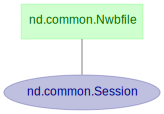

In [7]:
dj.Diagram(nd.common.Nwbfile()) + dj.Diagram(nd.common.Session())

Any line is a dependency. 

The solid line indicates that the Nwbfile is the primary key for Session, so each Session has exactly one Nwbfile associated with it. Green rectangel means manual data tier; blue circle means imported

The session also contains references to other schema, including Subject, Institution, etc. 

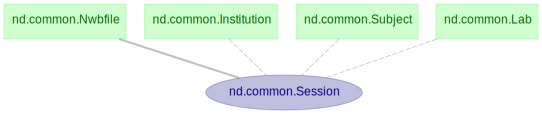

In [8]:
dj.Diagram(nd.common.Nwbfile()) + dj.Diagram(nd.common.Session()) + dj.Diagram(nd.common.Subject()) + dj.Diagram(nd.common.Institution()) + dj.Diagram(nd.common.Lab())

Solid line means foreign key as primary key
dashed line means foreign key as alternate key

Now let's look at the raw data schema, which contains a reference to the continuous electrophysiology data at the full 20 KHz sampling rate:

In [9]:
nd.common.Raw()

nwb_file_name the name of the NWB file,interval_list_name descriptive name of this interval list,raw_object_id the NWB object ID for loading this object from the file,"sampling_rate Sampling rate calculated from data, in Hz",comments,description
beans20190718-trim_.nwb,raw data valid times,b03547f7-7f3c-4d5b-ad9a-0beb267c8992,20000.0,no comments,Electrical series registered on electrode
beans20190718_.nwb,raw data valid times,d97e590f-4c09-470d-9a19-38d667b3c3da,20000.0,sample comment,Electrical series registered on electrode
despereaux20191125_.nwb,raw data valid times,5e0ad989-7603-42b1-8614-4c0f9a6007fa,30000.0,sample comment,Electrical series registered on electrode
Jaq20190826_.nwb,raw data valid times,a59662aa-ebc2-463a-9c2d-68358f6359d6,30000.0,sample comment,Electrical series registered on electrode


The raw data has two primary keys: the Session and an IntervalList that defines the set of time intervals for which the data are valid:

__not true; they are foreign keys, not primary keys; each table has exactly one primary key__ 

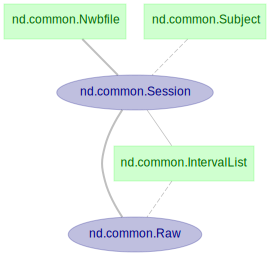

In [10]:
dj.Diagram(nd.common.Subject()) + dj.Diagram(nd.common.Session()) + dj.Diagram(nd.common.Nwbfile()) + dj.Diagram(nd.common.Raw())

solid line: foreign key is part of primary key
thick solid line: foreign key is only attribute of primary key

The raw data also has a reference to an NWB object id, which allows direct loading of an NWB object from the file. We can get this raw data object with a simple DataJoint query:

In [11]:
raw_data = (nd.common.Raw() & {'nwb_file_name' : 'beans20190718-trim_.nwb'}).fetch_nwb()[0]
raw_data

{'nwb_file_name': 'beans20190718-trim_.nwb',
 'interval_list_name': 'raw data valid times',
 'raw_object_id': 'b03547f7-7f3c-4d5b-ad9a-0beb267c8992',
 'sampling_rate': 20000.0,
 'comments': 'no comments',
 'description': 'Electrical series registered on electrode',
 'raw': e-series pynwb.ecephys.ElectricalSeries at 0x140697409002032
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (4000000, 256), type "<i2">
   description: Electrical series registered on electrode
   electrodes: electrodes <class 'hdmf.common.table.DynamicTableRegion'>
   interval: 1
   resolution: -1.0
   timestamps: <HDF5 dataset "timestamps": shape (4000000,), type "<f8">
   timestamps_unit: seconds
   unit: volts}

Thus, `raw_data['raw']` is the electrical series from the NWB file from which data can be retrieved and analyzed.

A couple of notes here:

1) `nd.common.Raw() & {'nwb_file_name' : 'beans20190718-trim_linkraw.nwb'}` matches elements of the schema with a dictionary with 'nwb_file_name' as the key and, in this case, 'beans20190718-trim_linkraw.nwb' as the value. The file name can also be retrieved from the first row of the Nwbfile table: `nwb_file_name = nd.common.Nwbfile().fetch1()['nwb_file_name']`

2) `fetch_nwb()` is a special function was added to the Raw schema to return NWB objects. 


### The first analysis one might do on raw data is to extract the local field potential from a set of electrodes, and there are LFP-related schema for that:

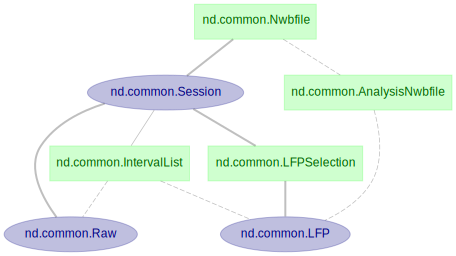

In [12]:
dj.Diagram(nd.common.Session()) + dj.Diagram(nd.common.Nwbfile()) + dj.Diagram(nd.common.Raw()) + dj.Diagram(nd.common.LFP())

Note here that the LFP schema has an entry from the AnalysisNwbfile schema. The AnalysisNwbfile is created when the LFP is created and serves to store the LFP time series. It also contains the key metadata from the parent Nwbfile, so it's easy to know which subject, etc. it came from.

Finally, here's a full diagram of all the schema:

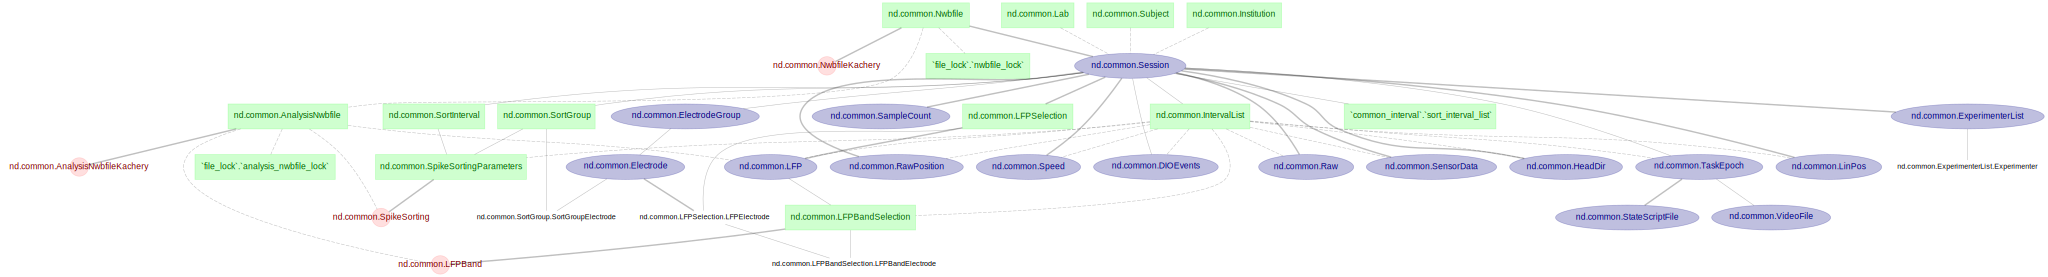

In [13]:
dj.Diagram(nd.common.Session())-2+5

In [24]:
nd.common

TypeError: 'module' object is not callable

In [36]:
dj.list_schemas()

['common_behav',
 'common_device',
 'common_dio',
 'common_ephys',
 'common_filter',
 'common_interval',
 'common_lab',
 'common_region',
 'common_sensors',
 'common_session',
 'common_spikesorting',
 'common_subject',
 'common_task',
 'file_lock',
 'mysql',
 'performance_schema',
 'sys',
 'test_schema']

The "kachery" entries refer to a file sharing system developed by Jermey Magland and colleagues, but you do not need to use that to use this repo.

Red means computed data tier